# Logistics Regression

### In this notebook, we will implement 'Classification' using Logistics Regression. Let's first briefly understand what is 'Logistics' function and where should we use it.

We are being introduced to Linear Regression where features have linear relationship with the target value. The target variable is continuous and can opt any value between a range. 

Example: Predicting sales of ice cream giving various features like temperature, population, price etc. 

But, what if our target variable can have only 2 output like Yes/No, 1-0. This is typical classification problem and our linear regression won't fit directly. So we need to tweak our LR model to fit this output. 

Luckily, mathetician found a solution to this problem and introduced "Sigmoid" or "Logistic" function which helps to solve this problem.

____

## Math behind Logistics Regression

To understand math let's see Linear Regression equation:

$y$ = $\beta$ + $\beta_{1} x_{1}$ + $\beta_{2} x_{2}$ + ... + $\beta_{n} x_{n}$ + $\varphi$

where:
y = target variable/dependent variable <br>
$x_{1}$ ... $x_{n}$ = independent variables <br>
$\beta_{n}$ = coefficient for variable $x_{n}$ <br>

____

### In Logistics Regression 

$log(odd)$ = $\beta$ + $\beta_{1} x_{1}$ + $\beta_{2} x_{2}$ + ... + $\beta_{n} x_{n}$ + $\varphi$

$log(p | (1-p))$ = $\beta$ + $\beta_{1} x_{1}$ + $\beta_{2} x_{2}$ + ... + $\beta_{n} x_{n}$ + $\varphi$

Assume: $\beta$ + $\beta_{1} x_{1}$ + $\beta_{2} x_{2}$ + ... + $\beta_{n} x_{n}$ + $\varphi$ = t

$log(p | (1-p))$  = t

by, applying basic algebra, we can get

p = 1 / (1 + $e^{-t}$)

Finally, we can write in mathematical formulation: 

$$ \text{logistic}(\eta)=\frac{1}{1+exp(-\eta)}\ $$

$ \text{logistic}(\eta)$ = output between 0 and 1 (probability estimate) <br>
$ (\eta) $ = input to the function (your algorithm’s prediction e.g. mx + b) <br>
e = base of natural log<br>

Clearly, p = probability of outcome and t is the same the linear equation we saw in Linear Regression.

![Sigmoid Curve](Images/sigmoid.png)

---
### Decision Boundary

Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

$$ p≥0.5, class=1 $$

$$ p<0.5, class=0 $$

For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive. If our prediction was .2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.


![Logistics Regression Decision Boundry](images/logistic_regression_sigmoid_w_threshold.png)

References:

1. https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
2. https://christophm.github.io/interpretable-ml-book/logistic.html

## Problem statement

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [34]:
### Importing important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## importing Logistics Regression from Scikit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



C:\Users\Z100054\AppData\Local\conda\conda\envs\Python 3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
## importing dataset

train = pd.read_csv("Data/Classification_Train.csv")

In [10]:
## Performing data EDA
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [72]:
## Checking number of classes in target variable

train['price_range'].unique()

array([1, 0], dtype=int64)

In [71]:
### As we are dealing with boolean output either 0 or 1, we will subset the dataset for have these 2 kind of outputs only.
### We won't do it in real world and try to implement any other ML method which can deal with multi-classifiers 

train = train[train['price_range'].isin([0,1])]
train.shape

(1000, 21)

In [73]:
## Checking data desribe

train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000
mean,1172.885000,0.488000,1.519400,0.505000,4.212000,0.521000,31.645000,0.507100,140.531000,4.449000,...,601.650000,1201.089000,1232.402000,12.268000,5.613000,10.987000,0.75100,0.523000,0.50000,0.50000
std,428.400152,0.500106,0.832043,0.500225,4.344183,0.499809,18.048067,0.287893,36.012302,2.294049,...,413.507064,426.239324,611.732959,4.215204,4.205106,5.494636,0.43265,0.499721,0.50025,0.50025
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.00000,0.000000,0.00000,0.00000
25%,808.000000,0.000000,0.600000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,277.500000,831.000000,703.750000,9.000000,2.000000,6.000000,1.00000,0.000000,0.00000,0.00000
50%,1138.000000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,141.000000,4.000000,...,518.500000,1185.000000,1209.500000,12.000000,5.000000,11.000000,1.00000,1.000000,0.50000,0.50000
75%,1522.250000,1.000000,2.300000,1.000000,7.000000,1.000000,47.000000,0.800000,172.000000,6.000000,...,882.250000,1534.500000,1699.500000,16.000000,8.000000,16.000000,1.00000,1.000000,1.00000,1.00000
max,1996.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1914.000000,1998.000000,2811.000000,19.000000,18.000000,20.000000,1.00000,1.000000,1.00000,1.00000


In [74]:
### Checking missing value

train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [75]:
### Checking unique entries in each cols
for col in train.columns:
    print(col, train[col].nunique())

battery_power 720
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 723
px_width 737
ram 812
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 2


In [76]:
### Individually checking the data in doubtful columns

# train['blue'].unique()  #shows if it has bluetooth or not #Categorical variable
# train['fc'].unique()
# train['sc_h'].unique()
train['touch_screen'].unique()  ## Categorical variable

array([0, 1], dtype=int64)

In [88]:
### Let's split the data into X and y

X = train.iloc[:,:len(train.columns)-1]
y = train.iloc[:,len(train.columns)-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0


In [78]:
y.head()

0    1
4    1
5    1
7    0
8    0
Name: price_range, dtype: int64

In [79]:
## Checking count of price_range
y.value_counts()

### By looking at the distribution we can see it is fairly distributed among each class, otherwise we would have add
### dummpy data using SMOTE function

1    500
0    500
Name: price_range, dtype: int64

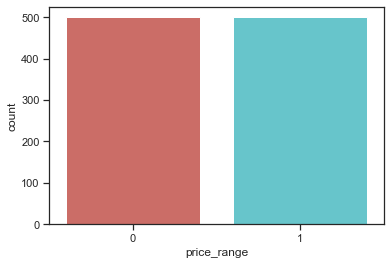

In [80]:
sns.countplot(x = y, palette = 'hls')

In [89]:
### Let's split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
X_train.shape

(700, 20)

In [82]:
### Let's use RFE (Recursive Feature Elimination) to eliminate unimporant features if any
### Read - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


data_final_vars = train.columns.values.tolist() ## Converting all columns to list
y = y ## Identifying our dependent variable 
X = [i for i in data_final_vars if i not in y]

LogReg = LogisticRegression()
rfe = RFE(LogReg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Z100054\AppData\Local\conda\conda\envs\Python 3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


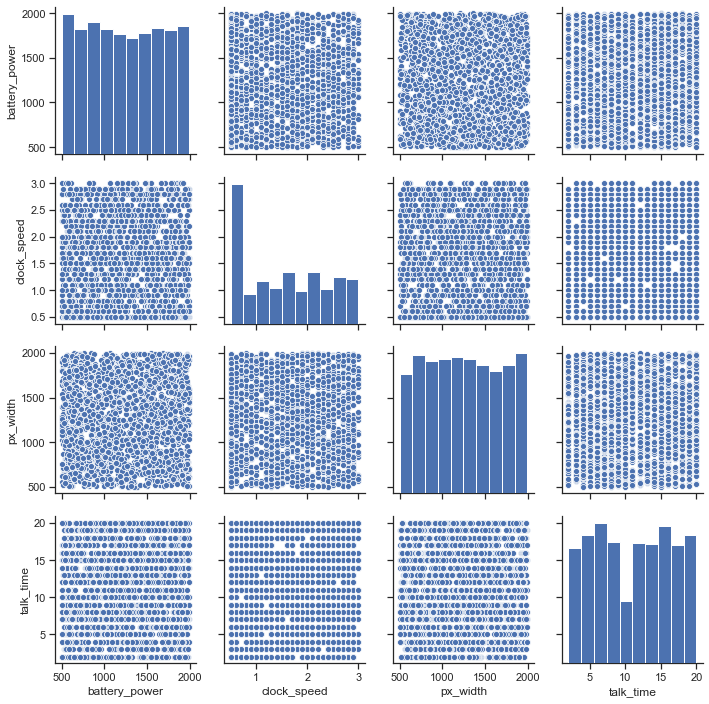

In [58]:
## Let's plot the colinear/pair graphs... Keeping the code here in case you want to try. 

sns.set(style="ticks", color_codes=True)
dt = train[['battery_power', 'clock_speed','px_width','talk_time']]
g = sns.pairplot(dt)

We can see all features are important so we can go ahead. You can check multi-colinearity also and if found, can use feature reduction techniques like PCA, LASSO, VIF etc.

In [83]:
### Implementing Logistics Regression

import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.245718
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.645      
Dependent Variable: price_range      AIC:              384.0051   
Date:               2020-08-31 13:42 BIC:              475.0267   
No. Observations:   700              Log-Likelihood:   -172.00    
Df Model:           19               LL-Null:          -485.10    
Df Residuals:       680              LLR p-value:      1.4860e-120
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
battery_power   0.0028    0.0004   7.4343  0.0000   0.0021   0.0035
blue           -0.4240    0.2784  -1.5232  0.1277

##### Studying p-value coefficient

We can see some some high p-value features. Let's drop them and re-iterate.

In [90]:
col_drop = ['dual_sim','fc','four_g','sc_w','pc']
X_train = X_train.drop(columns = col_drop )
X_test = X_test.drop(columns = col_drop )
y_train = y_train.drop(columns = col_drop )
y_test = y_test.drop(columns = col_drop )

In [91]:
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249299
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.640      
Dependent Variable: price_range      AIC:              379.0186   
Date:               2020-08-31 13:46 BIC:              447.2848   
No. Observations:   700              Log-Likelihood:   -174.51    
Df Model:           14               LL-Null:          -485.10    
Df Residuals:       685              LLR p-value:      1.6456e-123
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
battery_power   0.0027    0.0004   7.2871  0.0000   0.0020   0.0034
blue           -0.4200    0.2764  -1.5198  0.1286

In [92]:
### Fitting this model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Z100054\AppData\Local\conda\conda\envs\Python 3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
### Predicting using the same model

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [94]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[124  32]
 [ 17 127]]


In [95]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       156
           1       0.80      0.88      0.84       144

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



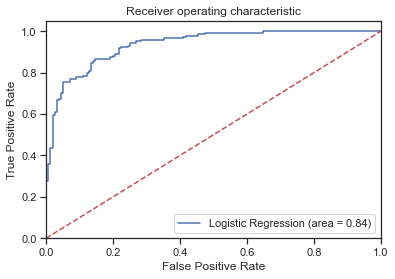

In [96]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Conclusion:

Model is able to predict 84 of the instances correctly. In further study we will build other classification model to improve the accuracy further. Thank you for reading. 